In [91]:
import pandas as pd

In [92]:
# read in bridge data to dataframe

bridges = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/Labs25-Bridges_to_Prosperity-TeamC-ds/main/final_csv/final_model_df.csv')

bridges.head()

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.42056,28.9662,Unknown,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.42486,28.957259999999998,Unknown,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.41855,28.969459999999998,Unknown,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.42715,28.95369,Unknown,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.44246,28.9333,Unknown,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,1


### Data Cleaning

In [93]:
# what are the data types for each of the features? 
# are there any that we will need to change?

bridges.dtypes

Province                        object
District                        object
Sector                          object
Bridge Site Name                object
Project Stage                   object
Project Code                     int64
Bridge Type                     object
 GPS (Latitude)                 object
GPS (Longitude)                 object
Individuals Directly Served     object
Assessment Date                 object
Original_Community_col          object
Community_Served                object
Prov_ID                          int64
Dist_ID                          int64
Sect_ID                          int64
Mean share of harvest sold     float64
School_count                     int64
 Population of Sector           object
Access rate                    float64
Umurenge SACCO                  object
MFIs                            object
Bank Branch                     object
ATM                             object
Bank Agent                      object
Mobile Money Agent       

*   GPS coordinates should be float values, not objects  
*   individuals served should be an integer...but there are alot of unknowns...what do we do with that?  
*   population of sector should be an integer, not object  
*   The average time to banking institutions shouldnt be objects either 

#### GPS Coordinates

In [94]:
# what is going on with the GPS coordinates?
# when trying to cast the GPS coordinate columns to float type, it throws
# a ValueError: could not conver string to float: 'Unknown'. 
# looks like we have values called 'Unknown' in the data set. 
# we will need to replace those.

bridges[bridges['GPS (Longitude)'] == 'Unknown']

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served
917,Western Province,Rutsiro,Musasa,Gitunu,Rejected,1013596,Unknown,Unknown,Unknown,Unknown,2018-09-24,Community Served 1,Gisiza,3,32,3208,18.3,5,"22,805.00",44.0,49:10,64:00,64:10,65:00,65:00,34:53,16,32,30,22,1
1205,Western Province,Nyabihu,Rambura,Murambi,Rejected,1013027,Suspended,Unknown,Unknown,Unknown,2018-08-27,Community Served 1,Murambi,3,34,3409,28.0,13,"28,484.00",43.0,54:00,57:41,60:00,63:01,56:00,32:00,18,43,28,11,1


In [95]:
# its the same two bridges that have unknown for the Latitude as well.
bridges[bridges[' GPS (Latitude)'] == 'Unknown']

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served
917,Western Province,Rutsiro,Musasa,Gitunu,Rejected,1013596,Unknown,Unknown,Unknown,Unknown,2018-09-24,Community Served 1,Gisiza,3,32,3208,18.3,5,"22,805.00",44.0,49:10,64:00,64:10,65:00,65:00,34:53,16,32,30,22,1
1205,Western Province,Nyabihu,Rambura,Murambi,Rejected,1013027,Suspended,Unknown,Unknown,Unknown,2018-08-27,Community Served 1,Murambi,3,34,3409,28.0,13,"28,484.00",43.0,54:00,57:41,60:00,63:01,56:00,32:00,18,43,28,11,1


In [96]:
# what is the mean lon, lat for the sect ID that these two bridges reside
sector_id = [3208, 3409]
# get just the bridges in Sectors that we have missing Lon and Lat.

for i in sector_id:
  tmp = bridges.loc[(bridges['Sect_ID'] == i) & (bridges['GPS (Longitude)'] != 'Unknown')]
  # change the column type to float and get the mean
  print(f"mean Longitude for sector {i}: {tmp['GPS (Longitude)'].astype('float').mean()}")
  print(f"mean Latitude for sector {i}: {tmp[' GPS (Latitude)'].astype('float').mean()}")


mean Longitude for sector 3208: 29.35906
mean Latitude for sector 3208: -1.943812
mean Longitude for sector 3409: 29.498763814285716
mean Latitude for sector 3409: -1.6838434857142859


In [97]:
# we will replace the unknown values for these with the above mean lon, lat

# the index number for missing bridge coordinates in sector 3208 is 917
bridges.loc[917, ' GPS (Latitude)'] = -1.943812
bridges.loc[917, 'GPS (Longitude)'] = 29.35906
# the index number for missing bridge coordinates in sector 3409 is 1205
bridges.loc[1205, ' GPS (Latitude)'] = -1.6838434857142859
bridges.loc[1205, 'GPS (Longitude)'] = 29.498763814285716



In [98]:
# verify those are updated
print(bridges[bridges['GPS (Longitude)'] == 'Unknown'], '\n')

print(bridges[bridges[' GPS (Latitude)'] == 'Unknown'])

Empty DataFrame
Columns: [Province, District, Sector, Bridge Site Name, Project Stage, Project Code, Bridge Type,  GPS (Latitude), GPS (Longitude), Individuals Directly Served, Assessment Date, Original_Community_col, Community_Served, Prov_ID, Dist_ID, Sect_ID, Mean share of harvest sold, School_count,  Population of Sector , Access rate, Umurenge SACCO, MFIs, Bank Branch, ATM, Bank Agent, Mobile Money Agent, Banked, Other formal (non-bank), Informal only, Excluded, num_communities_served]
Index: [] 

Empty DataFrame
Columns: [Province, District, Sector, Bridge Site Name, Project Stage, Project Code, Bridge Type,  GPS (Latitude), GPS (Longitude), Individuals Directly Served, Assessment Date, Original_Community_col, Community_Served, Prov_ID, Dist_ID, Sect_ID, Mean share of harvest sold, School_count,  Population of Sector , Access rate, Umurenge SACCO, MFIs, Bank Branch, ATM, Bank Agent, Mobile Money Agent, Banked, Other formal (non-bank), Informal only, Excluded, num_communities_serv

In [99]:
# now we need to make sure that the coordinates are floats not objects

bridges[[' GPS (Latitude)', 'GPS (Longitude)']] = bridges[[' GPS (Latitude)', 'GPS (Longitude)']].astype(float)

#### Individuals Served

In [100]:
# if individuals directly served is "Unknown" we will change it to 0.
bridges['Individuals Directly Served'] = bridges['Individuals Directly Served'].replace('Unknown', 0.0)

In [101]:
# change the individuals served to an int value type.
bridges['Individuals Directly Served'] = bridges['Individuals Directly Served'].astype(float).astype(int)

#### Population by Sector

In [102]:
# population should be an integer

test = bridges.copy()
test.head()

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.42056,28.96620,0,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.42486,28.95726,0,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.41855,28.96946,0,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.42715,28.95369,0,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.44246,28.93330,0,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,"19,359.00",64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,1


In [103]:
# helper function to clean and make string an integer
def to_int(i):
  return int(float(i.strip().replace(',', '')))

In [104]:
test[' Population of Sector '] = test[' Population of Sector '].apply(to_int)

In [105]:
test.head()

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.42056,28.96620,0,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,19359,64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.42486,28.95726,0,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,19359,64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.41855,28.96946,0,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,19359,64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.42715,28.95369,0,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,19359,64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,5
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.44246,28.93330,0,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,19359,64.0,38:21,49:27,53:26,52:00,50:17,32:21,27,38,14,21,1


In [106]:
# run this on the acutal data frame now. 

bridges[' Population of Sector '] = bridges[' Population of Sector '].apply(to_int)

In [107]:
bridges.dtypes

Province                        object
District                        object
Sector                          object
Bridge Site Name                object
Project Stage                   object
Project Code                     int64
Bridge Type                     object
 GPS (Latitude)                float64
GPS (Longitude)                float64
Individuals Directly Served      int64
Assessment Date                 object
Original_Community_col          object
Community_Served                object
Prov_ID                          int64
Dist_ID                          int64
Sect_ID                          int64
Mean share of harvest sold     float64
School_count                     int64
 Population of Sector            int64
Access rate                    float64
Umurenge SACCO                  object
MFIs                            object
Bank Branch                     object
ATM                             object
Bank Agent                      object
Mobile Money Agent       

#### Average time to banking institutions

In [108]:
# make copy for testing 

temp_travel = bridges.copy()

In [109]:
# These should all be float values
travel_times = ['Umurenge SACCO', 'MFIs', 'Bank Branch', 'ATM', 'Bank Agent', 'Mobile Money Agent']

bridges[['Project Code'] + travel_times]

,Project Code,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent
0,1014107,38:21,49:27,53:26,52:00,50:17,32:21
1,1014106,38:21,49:27,53:26,52:00,50:17,32:21
2,1014108,38:21,49:27,53:26,52:00,50:17,32:21
3,1014105,38:21,49:27,53:26,52:00,50:17,32:21
4,1014166,38:21,49:27,53:26,52:00,50:17,32:21
...,...,...,...,...,...,...,...
1342,1013231,45:00,49:00,47:19,51:00,49:00,29:22
1343,1007493,45:00,49:00,47:19,51:00,49:00,29:22
1344,1012820,45:00,49:00,47:19,51:00,49:00,29:22
1345,1012818,45:00,49:00,47:19,51:00,49:00,29:22


In [110]:
temp_travel[['Project Code', 'Umurenge SACCO']][0:5]

,Project Code,Umurenge SACCO
0,1014107,38:21
1,1014106,38:21
2,1014108,38:21
3,1014105,38:21
4,1014166,38:21


In [111]:
# test on for loop...will make a function to apply
for i in travel_times:  
  print(i,'\n')
  #filter dataframe by just the wanted columns
  tmp = temp_travel[['Project Code', i]][0:5]
  print(tmp, '\n')

  # split the columns into a minutes and second columns
  tmp[[f'{i} Min', f'{i} Sec']] = tmp[i].str.split(':', n=2, expand=True)
  
  # cast new minutes and seconds columns to be an integer
  tmp[f'{i} Min'] = tmp[f'{i} Min'].astype(int)
  tmp[f'{i} Sec'] = tmp[f'{i} Sec'].astype(int)

  # convert seconds into minutes
  tmp[f'{i} Sec'] = tmp[f'{i} Sec'] / 60

  # add the seconds column to the minutes column
  tmp[f'{i} Min'] = tmp[f'{i} Min'] + tmp[f'{i} Sec']

  # Drop the original column and the seconds column since we dont need anymore
  tmp = tmp.drop(columns=[i, f'{i} Sec'] )
  print(tmp, '\n')
  print('______________')

Umurenge SACCO 

   Project Code Umurenge SACCO
0       1014107          38:21
1       1014106          38:21
2       1014108          38:21
3       1014105          38:21
4       1014166          38:21 

   Project Code  Umurenge SACCO Min
0       1014107               38.35
1       1014106               38.35
2       1014108               38.35
3       1014105               38.35
4       1014166               38.35 

______________
MFIs 

   Project Code   MFIs
0       1014107  49:27
1       1014106  49:27
2       1014108  49:27
3       1014105  49:27
4       1014166  49:27 

   Project Code  MFIs Min
0       1014107     49.45
1       1014106     49.45
2       1014108     49.45
3       1014105     49.45
4       1014166     49.45 

______________
Bank Branch 

   Project Code Bank Branch
0       1014107       53:26
1       1014106       53:26
2       1014108       53:26
3       1014105       53:26
4       1014166       53:26 

   Project Code  Bank Branch Min
0       1014107        53

In [112]:
def convert_travel_times(df, column):
  X = df.copy()
  # print(i,'\n')
  #filter dataframe by just the wanted columns
  X = X[['Project Code', column]]
  # print(tmp, '\n')

  # split the columns into a minutes and second columns
  X[[f'{column} Min', f'{column} Sec']] = X[column].str.split(':', n=2, expand=True)
  
  # cast new minutes and seconds columns to be an integer
  X[f'{column} Min'] = X[f'{column} Min'].astype(int)
  X[f'{column} Sec'] = X[f'{column} Sec'].astype(int)

  # convert seconds into minutes
  X[f'{column} Sec'] = X[f'{column} Sec'] / 60

  # add the seconds column to the minutes column
  X[f'{column} Min'] = X[f'{column} Min'] + X[f'{column} Sec']

  # Drop the original column and the seconds column since we dont need anymore
  X = X.drop(columns=[column, f'{column} Sec'] )
  # print(tmp, '\n')
  # print('______________')

  return X


In [113]:
travel_times

['Umurenge SACCO',
 'MFIs',
 'Bank Branch',
 'ATM',
 'Bank Agent',
 'Mobile Money Agent']

In [114]:
umurenge_SACCO_df = convert_travel_times(temp_travel, 'Umurenge SACCO')
MFIs_df = convert_travel_times(temp_travel, 'MFIs')
Bank_Branch_df = convert_travel_times(temp_travel, 'Bank Branch')
ATM_df = convert_travel_times(temp_travel, 'ATM')
Bank_Agent = convert_travel_times(temp_travel, 'Bank Agent')
Mobile_Money_Agent = convert_travel_times(temp_travel, 'Mobile Money Agent')

In [115]:
umurenge_SACCO_df

,Project Code,Umurenge SACCO Min
0,1014107,38.35
1,1014106,38.35
2,1014108,38.35
3,1014105,38.35
4,1014166,38.35
...,...,...
1342,1013231,45.00
1343,1007493,45.00
1344,1012820,45.00
1345,1012818,45.00


In [116]:
# now that we have our dataframe with the corrected columns we need to 
# drop the original columns and then merge the new dataframes to the bridges
# dataframe (merge on project code)

bridges = bridges.drop(columns=travel_times)



In [117]:
from functools import reduce

dfs = [bridges, umurenge_SACCO_df, MFIs_df, Bank_Branch_df, ATM_df, Bank_Agent, Mobile_Money_Agent]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Project Code'), dfs)

In [118]:
df_final

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served,Umurenge SACCO Min,MFIs Min,Bank Branch Min,ATM Min,Bank Agent Min,Mobile Money Agent Min
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.420560,28.966200,0,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.424860,28.957260,0,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.418550,28.969460,0,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.427150,28.953690,0,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.442460,28.933300,0,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,19359,64.0,27,38,14,21,1,38.35,49.45,53.433333,52.0,50.283333,32.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Southern Province,Nyamagabe,Kamegeri,Gitantu,Identified,1013231,Suspension,2.495585,29.583017,0,2018-09-02,Community Served 1,Gitantu,2,25,2506,20.1,5,13579,40.0,20,37,28,15,5,45.00,49.00,47.316667,51.0,49.000000,29.366667
1343,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Rejected,1007493,Suspended,-2.337289,29.459825,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667
1344,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Identified,1012820,Suspended,-2.332691,29.466929,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667
1345,Southern Province,Nyamagabe,Mushubi,Cyori,Rejected,1012818,Suspended,-2.318180,29.425777,0,2018-08-17,Community Served 1,Bweramana,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667


In [119]:
df_final.dtypes

Province                        object
District                        object
Sector                          object
Bridge Site Name                object
Project Stage                   object
Project Code                     int64
Bridge Type                     object
 GPS (Latitude)                float64
GPS (Longitude)                float64
Individuals Directly Served      int64
Assessment Date                 object
Original_Community_col          object
Community_Served                object
Prov_ID                          int64
Dist_ID                          int64
Sect_ID                          int64
Mean share of harvest sold     float64
School_count                     int64
 Population of Sector            int64
Access rate                    float64
Banked                           int64
Other formal (non-bank)          int64
Informal only                    int64
Excluded                         int64
num_communities_served           int64
Umurenge SACCO Min       

#### Adjusting Project Stage

project stage has bridge stages that will be moved to the completed stage soon, so we will want those grouped in the same project stage

In [163]:
df_final['Project Stage'].unique()

array(['Rejected', 'Identified', 'Complete', 'Under Construction',
       'Prospecting', 'Confirmed'], dtype=object)

In [164]:
(df_final['Project Stage'].str.contains('Complete|Under Construction')).value_counts()

False    1310
True       37
Name: Project Stage, dtype: int64

In [165]:
# All project stages types that contain Complete, Under Construction, or Confirmed
# are grouped into the same category

completed = df_final['Project Stage'].str.contains('Complete|Under Construction|Confirmed')

df_final.loc[completed, 'Project Stage'] = 'Complete/In_Progress'

df_final['Project Stage'].unique()

array(['Rejected', 'Identified', 'Complete/In_Progress', 'Prospecting'],
      dtype=object)

### Prioritization Model

In [166]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [167]:
df_final

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served,Umurenge SACCO Min,MFIs Min,Bank Branch Min,ATM Min,Bank Agent Min,Mobile Money Agent Min,Cluster
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.420560,28.966200,0,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,3
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.424860,28.957260,0,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,3
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.418550,28.969460,0,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,3
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.427150,28.953690,0,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,3
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.442460,28.933300,0,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,19359,64.0,27,38,14,21,1,38.35,49.45,53.433333,52.0,50.283333,32.350000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Southern Province,Nyamagabe,Kamegeri,Gitantu,Identified,1013231,Suspension,2.495585,29.583017,0,2018-09-02,Community Served 1,Gitantu,2,25,2506,20.1,5,13579,40.0,20,37,28,15,5,45.00,49.00,47.316667,51.0,49.000000,29.366667,0
1343,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Rejected,1007493,Suspended,-2.337289,29.459825,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,3
1344,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Identified,1012820,Suspended,-2.332691,29.466929,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,3
1345,Southern Province,Nyamagabe,Mushubi,Cyori,Rejected,1012818,Suspended,-2.318180,29.425777,0,2018-08-17,Community Served 1,Bweramana,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,3


For us to perform clustering we will need to update some of the features to be used in PCA and or a clustering algorith. 



*   Bridge type needs to be numerical. (assign numbers for type)
*   Project Stage needs to be numberical. (assign number for stage)
*   We will drop features, Province, District, Sector, Bridge Name, Project Code, Assessment Date, Original Community, Community Served, Prov_ID Dist_ID, Sect_ID.
**bold text**




In [200]:
# columns_to_keep = ['Project Stage', 'Bridge Type', ' GPS (Latitude)', 'GPS (Longitude)',
#        'Individuals Directly Served', 'Mean share of harvest sold', 'School_count',
#        ' Population of Sector ', 'Access rate', 'Banked', 'Other formal (non-bank)', 'Informal only', 'Excluded',
#        'num_communities_served', 'Umurenge SACCO Min', 'MFIs Min',
#        'Bank Branch Min', 'ATM Min', 'Bank Agent Min',
#        'Mobile Money Agent Min']

columns_to_keep = ['Project Stage', 'Bridge Type', 'Mean share of harvest sold', 'School_count',
       ' Population of Sector ', 'Access rate', 'Banked', 'Other formal (non-bank)', 'Informal only', 'Excluded',
       'num_communities_served', 'Umurenge SACCO Min', 'MFIs Min',
       'Bank Branch Min', 'ATM Min', 'Bank Agent Min',
       'Mobile Money Agent Min']

In [201]:
testing = df_final.copy()
testing = testing[columns_to_keep]

In [202]:
testing.dtypes

Project Stage                  object
Bridge Type                    object
Mean share of harvest sold    float64
School_count                    int64
 Population of Sector           int64
Access rate                   float64
Banked                          int64
Other formal (non-bank)         int64
Informal only                   int64
Excluded                        int64
num_communities_served          int64
Umurenge SACCO Min            float64
MFIs Min                      float64
Bank Branch Min               float64
ATM Min                       float64
Bank Agent Min                float64
Mobile Money Agent Min        float64
dtype: object

#### Kmeans Clustering.
first do elbow method: based on the sum of square distances when using different total of clusters

In [203]:

# Define which columns should be encoded vs scaled
columns_to_encode = ['Project Stage', 'Bridge Type']
columns_to_scale  = testing.select_dtypes([np.number]).columns

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(testing[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(testing[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [204]:
processed_data.shape

(1347, 23)

In [205]:
testing.shape

(1347, 17)

In [206]:
sum_of_square_distances = []

for i in range(1,16):
  km = KMeans(n_clusters=i)
  km = km.fit(processed_data)
  sum_of_square_distances.append(km.inertia_)

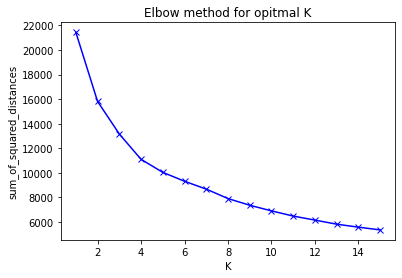

In [207]:

plt.plot(range(1,16), sum_of_square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for opitmal K')

plt.show()

In [213]:
# Perform K-Means Clustering on the Dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(processed_data)
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [214]:
# now add these lables to our original data frame and lets look and see if there
# is anything that groups completed bridges together more frequently

In [215]:
df_final['Cluster'] = labels

In [216]:
df_final

,Province,District,Sector,Bridge Site Name,Project Stage,Project Code,Bridge Type,GPS (Latitude),GPS (Longitude),Individuals Directly Served,Assessment Date,Original_Community_col,Community_Served,Prov_ID,Dist_ID,Sect_ID,Mean share of harvest sold,School_count,Population of Sector,Access rate,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served,Umurenge SACCO Min,MFIs Min,Bank Branch Min,ATM Min,Bank Agent Min,Mobile Money Agent Min,Cluster
0,Western Province,Rusizi,Giheke,Buzi,Rejected,1014107,Suspended,-2.420560,28.966200,0,2018-10-29,Community Served 1,Buzi,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,2
1,Western Province,Rusizi,Giheke,Kamigisha,Rejected,1014106,Suspended,-2.424860,28.957260,0,2018-10-29,Community Served 1,Kabuga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,2
2,Western Province,Rusizi,Giheke,Gacyamo,Rejected,1014108,Suspension,-2.418550,28.969460,0,2018-10-29,Community Served 1,Gacyamo,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,2
3,Western Province,Rusizi,Giheke,Nyakabanda,Rejected,1014105,Suspended,-2.427150,28.953690,0,2018-10-29,Community Served 1,Kanoga,3,36,3605,20.1,6,19359,64.0,27,38,14,21,5,38.35,49.45,53.433333,52.0,50.283333,32.350000,2
4,Western Province,Rusizi,Giheke,Impala,Rejected,1014166,Unknown,-2.442460,28.933300,0,2018-10-29,Community Served 1,Impala,3,36,3605,20.1,6,19359,64.0,27,38,14,21,1,38.35,49.45,53.433333,52.0,50.283333,32.350000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Southern Province,Nyamagabe,Kamegeri,Gitantu,Identified,1013231,Suspension,2.495585,29.583017,0,2018-09-02,Community Served 1,Gitantu,2,25,2506,20.1,5,13579,40.0,20,37,28,15,5,45.00,49.00,47.316667,51.0,49.000000,29.366667,2
1343,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Rejected,1007493,Suspended,-2.337289,29.459825,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,2
1344,Southern Province,Nyamagabe,Mushubi,Nyagisumo,Identified,1012820,Suspended,-2.332691,29.466929,0,2018-08-17,Community Served 1,Nyagisumo,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,2
1345,Southern Province,Nyamagabe,Mushubi,Cyori,Rejected,1012818,Suspended,-2.318180,29.425777,0,2018-08-17,Community Served 1,Bweramana,2,25,2514,20.1,7,12777,40.0,20,37,28,15,4,45.00,49.00,47.316667,51.0,49.000000,29.366667,2


In [217]:
df_final.groupby(by=['Cluster', 'Project Stage']).count()

Province  ...  Mobile Money Agent Min
Cluster Project Stage                   ...                        
0       Complete/In_Progress        30  ...                      30
        Identified                 168  ...                     168
        Prospecting                 13  ...                      13
        Rejected                   764  ...                     764
1       Complete/In_Progress         1  ...                       1
        Identified                   2  ...                       2
        Rejected                    47  ...                      47
2       Complete/In_Progress        12  ...                      12
        Identified                  54  ...                      54
        Prospecting                  1  ...                       1
        Rejected                   255  ...                     255

[11 rows x 30 columns]

In [135]:
['Umurenge SACCO Min', 'MFIs Min', 'Bank Branch Min', 'ATM Min', 'Bank Agent Min','Mobile Money Agent Min']

Index(['Province', 'District', 'Sector', 'Bridge Site Name', 'Project Stage',
       'Project Code', 'Bridge Type', ' GPS (Latitude)', 'GPS (Longitude)',
       'Individuals Directly Served', 'Assessment Date',
       'Original_Community_col', 'Community_Served', 'Prov_ID', 'Dist_ID',
       'Sect_ID', 'Mean share of harvest sold', 'School_count',
       ' Population of Sector ', 'Access rate', 'Banked',
       'Other formal (non-bank)', 'Informal only', 'Excluded',
       'num_communities_served', 'Umurenge SACCO Min', 'MFIs Min',
       'Bank Branch Min', 'ATM Min', 'Bank Agent Min',
       'Mobile Money Agent Min', 'Cluster'],
      dtype='object')

### Visualize with plotly

In [220]:
df_final.columns

Index(['Province', 'District', 'Sector', 'Bridge Site Name', 'Project Stage',
       'Project Code', 'Bridge Type', ' GPS (Latitude)', 'GPS (Longitude)',
       'Individuals Directly Served', 'Assessment Date',
       'Original_Community_col', 'Community_Served', 'Prov_ID', 'Dist_ID',
       'Sect_ID', 'Mean share of harvest sold', 'School_count',
       ' Population of Sector ', 'Access rate', 'Banked',
       'Other formal (non-bank)', 'Informal only', 'Excluded',
       'num_communities_served', 'Umurenge SACCO Min', 'MFIs Min',
       'Bank Branch Min', 'ATM Min', 'Bank Agent Min',
       'Mobile Money Agent Min', 'Cluster'],
      dtype='object')

In [237]:
import plotly.graph_objects as go

import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_final['text'] = df_final['Project Stage'] + ',' + df_final['Cluster'].astype(str) + ', ' + df_final['Sector']

fig = go.Figure(data=go.Scattergeo(
        lon = df_final['GPS (Longitude)'],
        lat = df_final[' GPS (Latitude)'],
        text = df_final['text'],
        mode = 'markers',
        marker_color = df_final['Cluster'],
        ))

fig.update_layout(
        title = 'Bridges 2 Prosperity Cluster ',
        geo_scope='africa',
    )
fig.show()

In [230]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_final['GPS (Longitude)'],
        lat = df_final[' GPS (Latitude)'],
        text = df_final['Project Stage'],
        mode = 'markers',
        marker_color = df_final['Project Stage'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='africa',
    )
fig.show()

ValueError: ignored